In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tseries.holiday import USPublicHolidayCalendar as calendarUSFH
import calendar


%matplotlib inline

plt.style.use('default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (12, 4)

ImportError: cannot import name USPublicHolidayCalendar

In [2]:
trips = pd.read_csv('data/trip.csv',low_memory=False)

In [3]:
def splitDateAndTime(dateAndTime):
    splitLine = dateAndTime.split(' ')
    return str(splitDate(splitLine[0]))  + splitTime(splitLine[1])

def splitDate(date):
    lineSplit = date.split('/')
    return str(lineSplit[2]) + str(lineSplit[0] if int(lineSplit[0]) >= 10 else '0' + str(lineSplit[0])) + str(lineSplit[1] if int(lineSplit[1]) >= 10 else '0' + str(lineSplit[1]) )

def splitTime(time):
    lineSplit = time.split(':')
    return str(lineSplit[0] if int(lineSplit[0]) >= 10 else '0' + str(lineSplit[0])) + str(lineSplit[1])

    

Unicamente vamos a tener en cuenta el dia en el cual se realizo el viaje

In [4]:
trips['start_date'] = trips['start_date'].apply(lambda x : pd.to_datetime(splitDate(x.split(' ')[0])) )

In [5]:
trips['end_date'] = trips['end_date'].apply(lambda x : pd.to_datetime(splitDate(x.split(' ')[0])) )

In [6]:
trips['numberdayofweek'] = trips['start_date'].apply(lambda x : x.dayofweek)
trips['dayofweek'] = trips['start_date'].apply(lambda x : calendar.day_name[x.dayofweek])

In [7]:
trips.sample()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,numberdayofweek,dayofweek
100312,139148,419,2013-12-31,Embarcadero at Folsom,51,2013-12-31,Embarcadero at Sansome,60,329,Subscriber,94609,1,Tuesday


### ¿Como es la distribucion de los viajes durante el año?

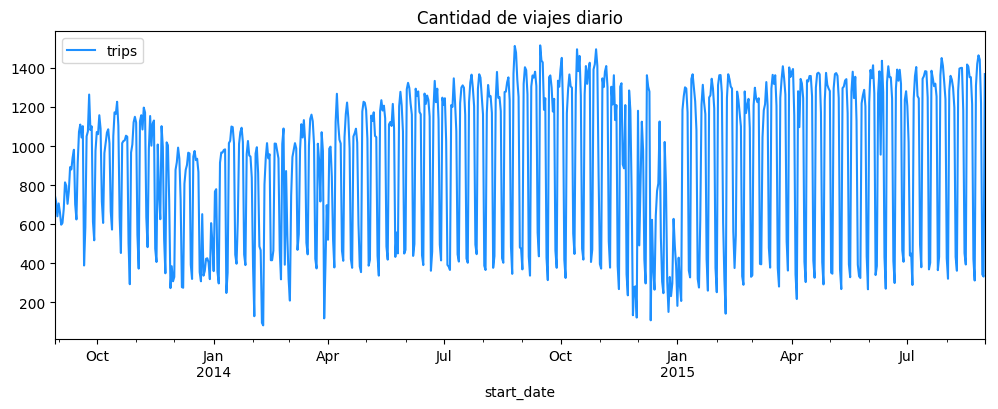

In [8]:
trips.assign(trips=1).groupby(by='start_date').sum().reset_index().plot(x='start_date',y='trips',title='Cantidad de viajes diario',color='dodgerblue')

### Aqui es clara que la cantidad de viajes disminuye cuando esta en la epoca invernal


# ¿Cual es la cantidad promedio de viajes en un dia de semana?

In [9]:
tripsByDay = trips[trips['duration'] < 7200 ]

In [10]:
tripsByDay = tripsByDay.assign(trips=1).groupby(by=['start_date','numberdayofweek','dayofweek']).sum().reset_index()

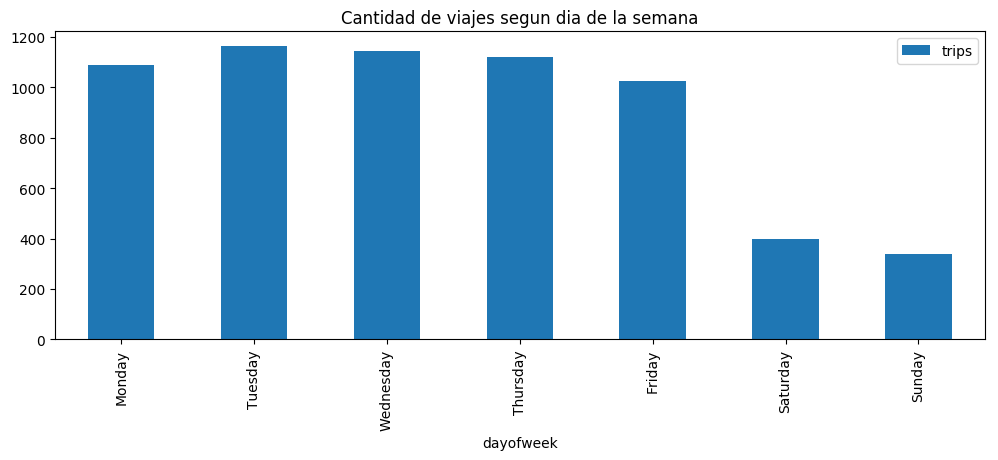

In [11]:
tripsByDay.groupby(by=['dayofweek','numberdayofweek']).mean().reset_index()\
    .sort_values('numberdayofweek')\
    .plot(kind='bar',x='dayofweek',y='trips',title='Cantidad de viajes segun dia de la semana')

In [27]:
tripsByDay = trips[trips['duration'] < 3000] 
tripsByDay['numberdayofweek'] = tripsByDay['numberdayofweek']\
        .apply(lambda x : int(x) + np.random.uniform(-0.4,0.4))
    

/home/brahvic/.local/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


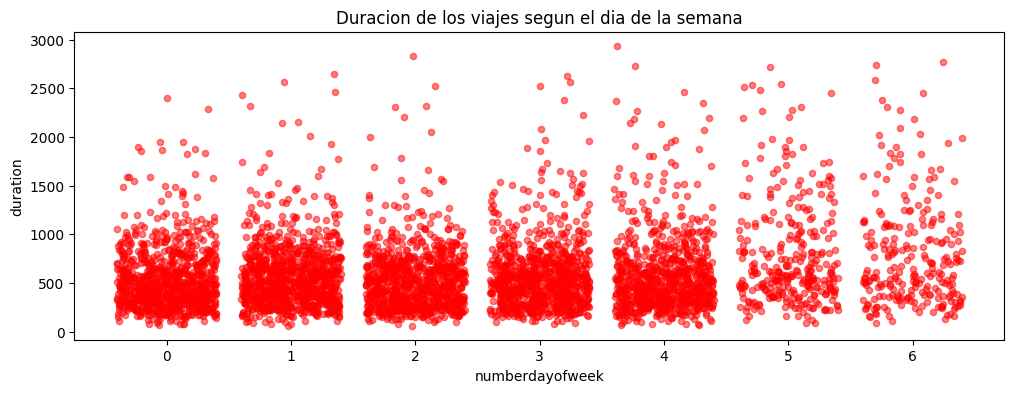

In [30]:
tripsByDay.sample(5000).plot(kind='scatter',x='numberdayofweek',y='duration',alpha=0.5,title='Duracion de los viajes segun el dia de la semana',color='red')

# ¿Cual es el promedio de duracion de un viaje, en los viajes que duran menos de 5000 segundos?

In [22]:
durationTrips = trips[trips['duration'] < 5000]

In [23]:
durationTripsByDay = durationTrips.assign(trips=1).groupby(by=['numberdayofweek','dayofweek']).mean().reset_index()

In [24]:
durationTripsByDay

,numberdayofweek,dayofweek,id,duration,start_station_id,end_station_id,bike_id,trips
0,0,Monday,472543.918562,576.359459,58.247304,58.267157,428.490030,1.0
1,1,Tuesday,468700.364038,566.061758,58.234662,58.216284,427.879461,1.0
2,2,Wednesday,469925.408844,573.062138,58.322230,58.300607,427.979608,1.0
3,3,Thursday,465456.827837,584.380291,58.097550,57.987228,428.099425,1.0
4,4,Friday,461617.989849,607.229523,58.088114,58.030368,428.209268,1.0
5,5,Saturday,419411.006777,922.248147,56.350508,56.244648,428.576245,1.0
6,6,Sunday,409282.584603,954.137773,55.575020,55.713688,423.136214,1.0


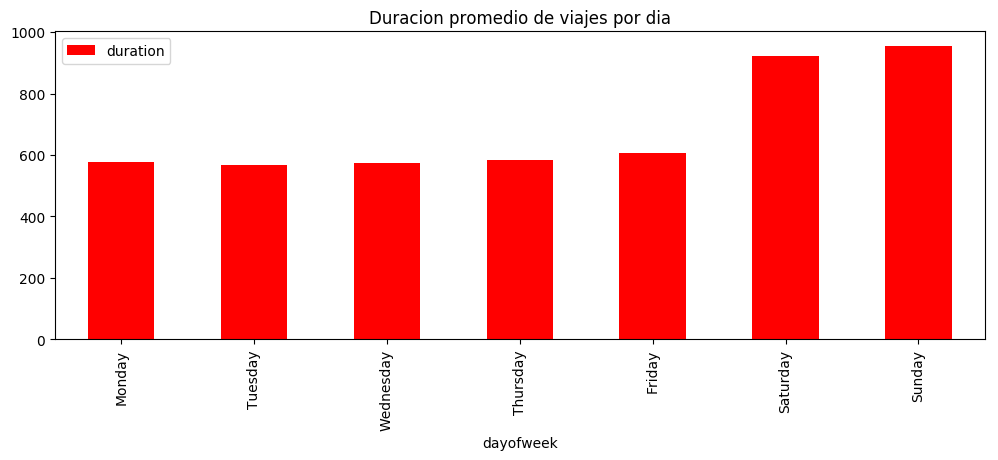

In [16]:
durationTripsByDay.plot(kind='bar',x='dayofweek',y='duration',color='red',title='Duracion promedio de viajes por dia')

### La duracion de los viajes los fines de semanas es mucho mayor.

# ¿Como se ve afectada la cantidad de viajes en los dias festivos?

In [17]:
holidayTrips = trips[trips['duration'] < 5000 ]

In [18]:

cal = calendarUSFH()
holidays = cal.holidays(return_name=True,start=pd.to_datetime('20140101'), end=pd.to_datetime('20141231'))
holidayDF = pd.DataFrame(holidays,columns=['festiveDay']).reset_index()

In [19]:
holidayDF.rename(columns={'index':'start_date'},inplace=True)

In [20]:
tripsInHolidays = holidayTrips[(holidayTrips['start_date'].isin(holidays.keys()) ) | (holidayTrips['end_date'].isin(holidays.keys()))]
tripsInHolidays = pd.merge(holidayDF, tripsInHolidays, on='start_date', how='left')

In [21]:
tripsInHolidays.shape

(5101, 14)

In [22]:

tripsInHolidays['dayofweek'] = tripsInHolidays['start_date'].apply(lambda x : calendar.day_name[x.dayofweek])

In [23]:
tripsInHolidays.sample()

,start_date,festiveDay,id,duration,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,numberdayofweek,dayofweek
1976,2014-07-04,July 4th,350846,2499,2nd at South Park,64,2014-07-04,Embarcadero at Sansome,60,504,Customer,90034,4,Friday


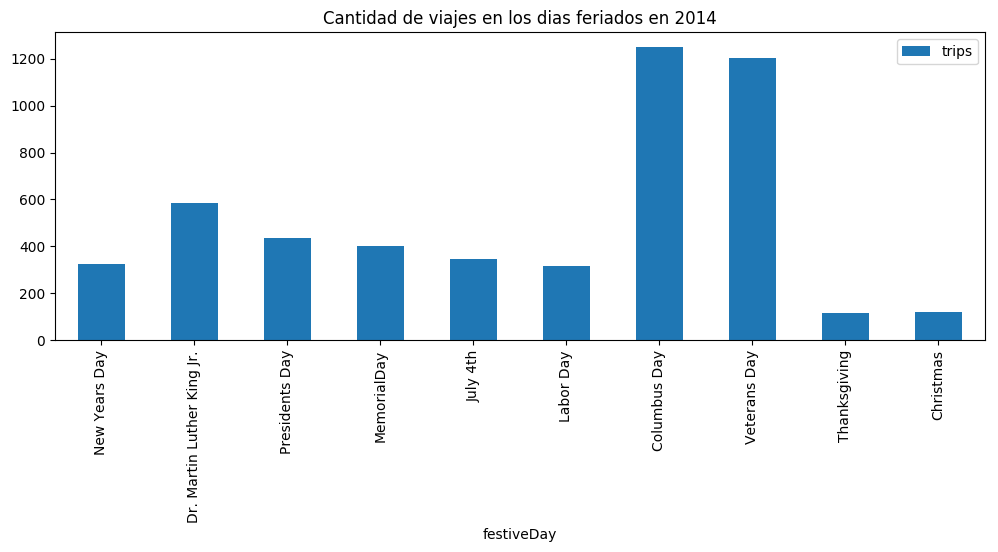

In [24]:
tripsInHolidays.assign(trips=1).groupby(by=['festiveDay','start_date','dayofweek']).sum().reset_index()\
        .sort_values(by='start_date').reset_index()\
        .plot(kind='bar',x='festiveDay',y='trips',title='Cantidad de viajes en los dias feriados en 2014')

### Aqui se pude ver como los viajes en los dias festivos normalmente se encuentran en valores normales para lo que seria un sabado o un domingo, a excepcion de 'Columbus Day' y 'Veretans Day'

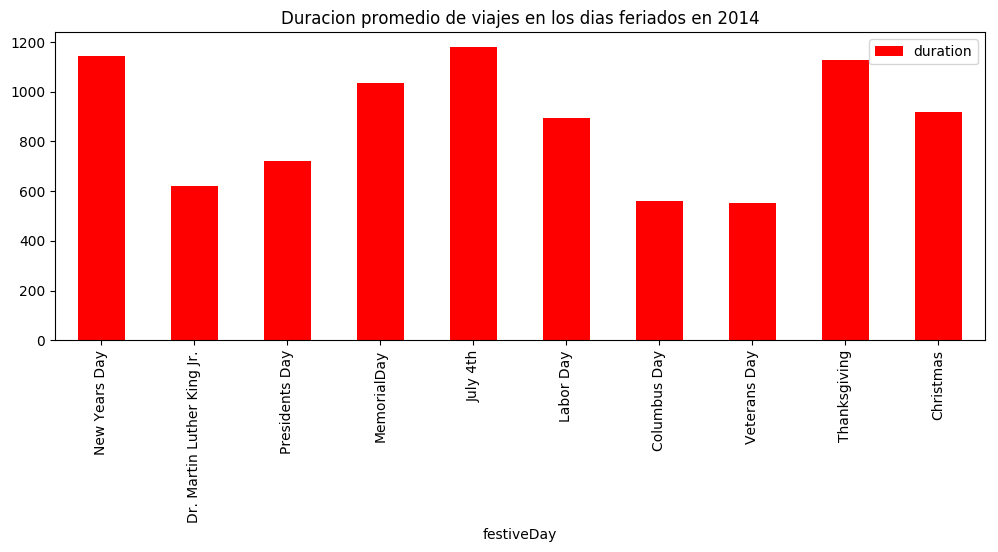

In [25]:
tripsInHolidays.assign(trips=1).groupby(by=['festiveDay','start_date','dayofweek']).mean().reset_index()\
        .sort_values(by='start_date').reset_index()\
        .plot(kind='bar',x='festiveDay',y='duration',title='Duracion promedio de viajes en los dias feriados en 2014',color='red')

### La duracion por su parte, en la mayoria tienen una cantidad similar a los fines de semanas, a exception de 'Columbus Day', 'Veretans Day' y 'Dr. Martin Luther King Jr.'

In [26]:
holidaysFullData = cal.holidays(return_name=True,start=trips.start_date.min(), end=trips.start_date.max())
holidaysFullDataDF = pd.DataFrame(holidaysFullData,columns=['festiveDay']).reset_index()

In [27]:
holidaysFullDataDF.rename(columns={'index':'start_date'},inplace=True)

In [28]:
tripsInHolidaysFullData = holidayTrips[(holidayTrips['start_date'].isin(holidaysFullData.keys()) ) | (holidayTrips['end_date'].isin(holidaysFullData.keys()))]
tripsInHolidaysFullData = pd.merge(holidaysFullDataDF, tripsInHolidaysFullData, on='start_date', how='left')

In [29]:

tripsInHolidaysFullData.shape

(10196, 14)

In [30]:
tripsInHolidaysFullData['dayofweek'] = tripsInHolidaysFullData['start_date']\
    .apply(lambda x : calendar.day_name[x.dayofweek])

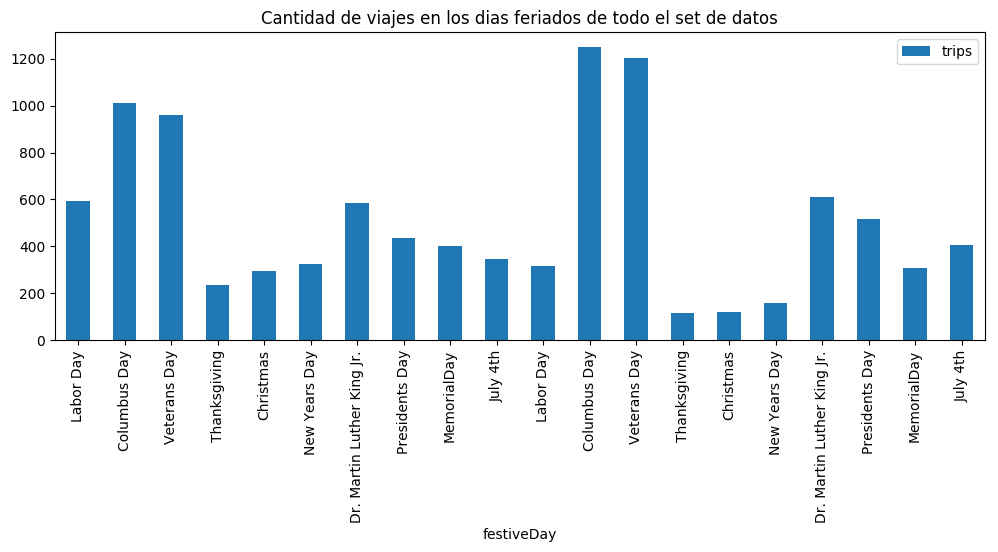

In [31]:
tripsInHolidaysFullData.assign(trips=1).groupby(by=['festiveDay','start_date','dayofweek']).sum().reset_index()\
        .sort_values(by='start_date').reset_index()\
        .plot(kind='bar',x='festiveDay',y='trips',title='Cantidad de viajes en los dias feriados de todo el set de datos')

### En el caso de tomar los dias feriados de todo el set de datos, nos encontramos ante la misma situacion que los dias festivos de 2014

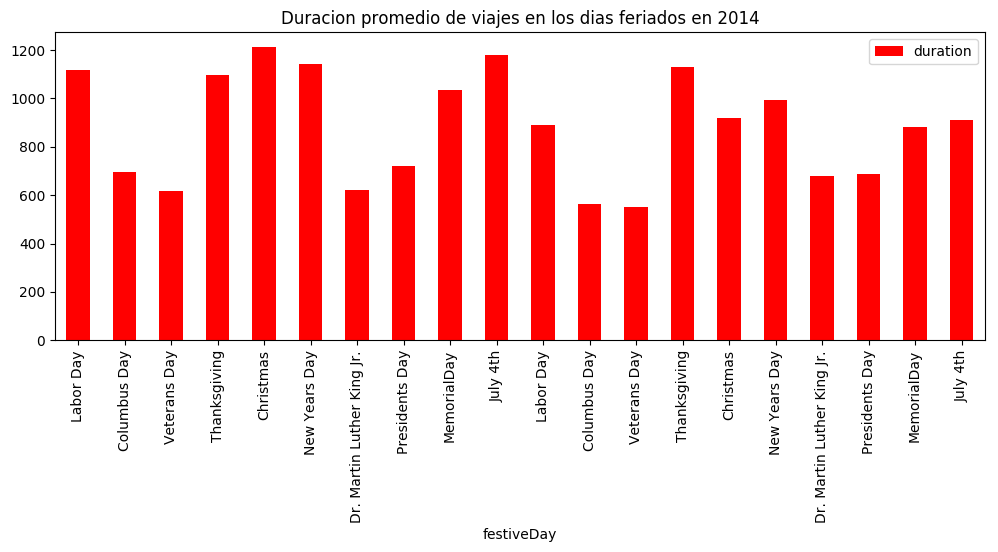

In [32]:
tripsInHolidaysFullData.assign(trips=1).groupby(by=['festiveDay','start_date','dayofweek']).mean().reset_index()\
        .sort_values(by='start_date').reset_index()\
        .plot(kind='bar',x='festiveDay',y='duration',title='Duracion promedio de viajes en los dias feriados en 2014',color='red')